In [1]:
# Import packages 
import numpy 
import scipy.optimize
import random
import ast

In [2]:
# Define read data from download files
def parseDataFromFile(fname):
    for l in open(fname):
        yield eval(l)

## TASK 1 - REGRESSION

In [3]:
# Read data from downloaded fantasy review
print("Reading data...") 
data = list(parseDataFromFile("fantasy_10000.json"))
print("done")

Reading data...
done


### QUESTION 2: Train the simple predictor to get theta and MSE

In [4]:
# Define get length of review_text
def getLength(data):
    if "review_text" in data.keys():
        return len(data["review_text"])
    else: return 0

In [5]:
# Make feature matrix
def feature(datum):
    return [1, datum]
length = [getLength(d) for d in data]

In [6]:
# Get X and y 
X = [feature(l) for l in length]
y = [d["rating"] for d in data]

In [7]:
# Get theta
theta, residuals, ranks, s = numpy.linalg.lstsq(X, y)
print("theta is: ", theta)

theta is:  [3.68568136e+00 6.87371675e-05]


/Users/markzuckerberg/anaconda3/envs/wintertime/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [8]:
# Define getMSE to get MSE by using residuals
def getMSE(residuals, y):
    MSE = residuals/len(y)
    return MSE

In [9]:
MSE = getMSE(residuals, y)
print("MSE is: ", float(MSE))

MSE is:  1.55220866223553


### QUESTION 3: Get one-hot encoding for the weekday and year

In [10]:
import dateutil.parser
# Define function to get the one-hot encoding 
def getDate(data):
    weekday = []
    year = []
    for d in data:
        t = dateutil.parser.parse(d['date_added'])
        weekday.append(t.weekday())
        year.append(t.year)
    return weekday, year

In [11]:
# Make the one-hot encoding of weekday and year
weekday, year = getDate(data)
year_min = min(year)
year_max = max(year)
year = numpy.eye(year_max-year_min+1)[numpy.array(year)-year_min]
weekday = numpy.eye(7)[weekday]
# Get the feature vecotrs for the first two examples
print(weekday[:2])
print(year[:2])

[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### QUESTION 4: Report MSE for different feature input
#### QUESTION 4.1: Use weekday and year directly as features

In [12]:
# Get the feature vector 
weekday_x, year_x = getDate(data)
x = [feature(l) for l in length]
x = numpy.array([x[i] + [weekday_x[i], year_x[i]] for i in range(len(x))])

In [13]:
theta, residuals, rank, s = numpy.linalg.lstsq(x, y)

/Users/markzuckerberg/anaconda3/envs/wintertime/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [14]:
# Get MSE by using residuals
MSE = getMSE(residuals, y)
print("MSE of Question 4.1 is: ", MSE)

MSE of Question 4.1 is:  [1.53677405]


#### QUESTION 4.2: Use one-hot of weekday and year as features

In [15]:
x = numpy.array([[1]+list(year[i]) + list(weekday[i]) + feature(getLength(d)) for i, d in enumerate(data)])
y = numpy.array(y)

In [16]:
theta,residuals,rank,s = numpy.linalg.lstsq(x, y)

/Users/markzuckerberg/anaconda3/envs/wintertime/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [17]:
# Apply another way to get MSE by using formula
def getMSE2(theta, x, y) :
    predict = theta*x
    predict = numpy.array(predict)
    predict = predict.sum(axis=1)
    error = (y - predict)
    error = numpy.square(error)
    error = numpy.sum(error)
    MSE = 1/len(y)*error
    return MSE

In [18]:
# Use the second way to get MSE of one-hot encoding
MSE = getMSE2(theta, x, y)
print("MSE for Question 4.2 is: ", MSE)

MSE for Question 4.2 is:  1.5123578656428205


### QUESTION 5: Split the data into two sets and perform previous tasks
#### QUESTION 5.1: Use weekday and year directly as features

In [19]:
weekday_x, year_x = getDate(data)
x = [feature(l) for l in length]
x = numpy.array([x[i] + [weekday_x[i], year_x[i]] for i in range(len(x))])
xy = list(zip(x, y))
random.shuffle(xy)
x = [d[0] for d in xy]
y = [d[1] for d in xy]

In [20]:
n = len(y)
X_train = numpy.array(x[:n//2], dtype='float')
X_test = numpy.array(x[n//2:], dtype='float')
y_train = numpy.array(y[:n//2], dtype='float')
y_test = numpy.array(y[n//2:], dtype='float')

In [21]:
theta,residuals,rank,s = numpy.linalg.lstsq(X_train, y_train)

/Users/markzuckerberg/anaconda3/envs/wintertime/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [22]:
MSE = getMSE(residuals, y_train)
print("MSE of training set: ", MSE)

MSE of training set:  [1.56529997]


In [23]:
theta,residuals,rank,s = numpy.linalg.lstsq(X_test, y_test)

/Users/markzuckerberg/anaconda3/envs/wintertime/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [24]:
MSE = getMSE(residuals, y_test)
print("MSE of testing set: ", MSE)

MSE of testing set:  [1.50734351]


#### QUESTION 5.2

In [25]:
weekday, year = getDate(data)
year_min = min(year)
year_max = max(year)
year = numpy.eye(year_max-year_min+1)[numpy.array(year)-year_min]
weekday = numpy.eye(7)[weekday]
x = numpy.array([[1]+list(year[i]) + list(weekday[i]) + feature(getLength(d)) for i, d in enumerate(data)])
y = numpy.array(y)
xy = list(zip(x, y))
random.shuffle(xy)
x = [d[0] for d in xy]
y = [d[1] for d in xy]
n = len(y)
X_train = numpy.array(x[:n//2], dtype='float')
X_test = numpy.array(x[n//2:], dtype='float')
y_train = numpy.array(y[:n//2], dtype='float')
y_test = numpy.array(y[n//2:], dtype='float')

In [26]:
theta,residuals,rank,s = numpy.linalg.lstsq(X_train, y_train)

/Users/markzuckerberg/anaconda3/envs/wintertime/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [27]:
MSE = getMSE2(theta, X_train, y_train)
print("MSE of training set: ", MSE)

MSE of training set:  1.5341596233163826


In [28]:
theta,residuals,rank,s = numpy.linalg.lstsq(X_test, y_test)

/Users/markzuckerberg/anaconda3/envs/wintertime/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [29]:
MSE = getMSE2(theta, X_test, y_test)
print("MSE of testing set: ", MSE)

MSE of testing set:  1.5720403379627474


### QUESTION 6

$$
\mathrm{MAE}=\frac{\sum_{i=1}^{n}\left|y_{i}-\hat{y_{i}}\right|}{n}
$$
We assume that **a trivial predictor: $y = \theta_{0}$**, and only consider $\sum_{i=1}^{n}\left|y_{i}-\hat{y_{i}}\right|$, the formula can be expressed as:
$$
\begin{aligned} f(\theta_{0}) &= \sum_{i}^{n}\left|{y_{i}}-\theta_{0}\right| \\ 
&=\sum_{i}^{k}\left(\theta_{0}-{y_{i}}\right)+\sum_{j}^{n-k}\left(\{y_{j}-\theta\right) \end{aligned}
$$
where $\left|y_{i}-\theta_{0}\right|$ is divided as a part: $\theta_{0} >= {y_{i}}$ which has $k$ values and another part: $y_{i} > \theta_{0}$ which has $n- k$ values.

The derivative of $f(\theta_{0})$ is: 
$$
\frac{\partial f(\theta_{0})}{\partial \theta_{0}}=2 k-n
$$
When $k = n/2$, the derivative of $theta_{0}$ is equal to 0. Therefore, when $\theta$ is larger than half number of $y$, $k$ equals to $n/2$, which indicates that $k$ is the medians of $y$.


## TASK 2 - CLASSIFICATION

In [30]:
# Read data from the beer dataset
print("Reading data...")
dataBeer = list(parseDataFromFile("beer_50000.json"))
print("done")

Reading data...
done


### QUESTION 7: Perform logistic regressor

In [31]:
# y = [d[’review/overall’] >= 4 for d in dataset]
def getY(data):
    if data["review/overall"] >= 4:
        return 1
    else:
        return 0

In [32]:
# Get length of the "review/text" data
def getReviewLength(data):
    if "review/text" in data.keys():
        return len(data["review/text"])
    else: return 0
    
def feature(datum):
    return [1, datum]

In [33]:
reviewLength = [getReviewLength(d) for d in dataBeer]
X = [feature(l) for l in reviewLength]
y = [getY(d) for d in dataBeer]

In [34]:
# shuffle the data
xy = list(zip(X, y))
random.shuffle(xy)
x = [d[0] for d in xy]
y = [d[1] for d in xy]

In [35]:
# Split the data with 4/5 as training set and 1/5 as testing set
n = len(xy)
n_train = (4/5)*n
n_test = (1/5)*n

In [36]:
x_train = x[:int(n_train)]
x_test = x[int(n_train):]
y_train = y[:int(n_train)]
y_test = y[int(n_train):]
len(y_test)

10000

In [37]:
# Train the model by setting class_weight = 'balanced'
from sklearn import linear_model
mod = linear_model.LogisticRegression(C=1.0, class_weight='balanced') 
mod.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
pred = mod.predict(x_test)
correct = pred == y_test

In [39]:
TP_ = numpy.logical_and(pred, y_test)
FP_ = numpy.logical_and(pred, numpy.logical_not(y_test))
TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(y_test))
FN_ = numpy.logical_and(numpy.logical_not(pred), y_test)

In [40]:
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)
# Print the result
print("TP is: ", TP)
print("FP is: ", FP)
print("TN is: ", TN)
print("FN is: ", FN)

TP is:  2858
FP is:  1166
TN is:  2083
FN is:  3893


In [41]:
# BER
BER = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))
print("Balanced Error Rates of the predictor is: ", BER)

Balanced Error Rates of the predictor is:  0.46776748280147185


### QUSTION 8: Plot the precision@K  

In [42]:
scores = mod.decision_function(x_test)
scores_labels = list(zip(scores, y_test))
scores_labels.sort(reverse = True)
sortedlabels = [x[1] for x in scores_labels]

In [43]:
x_axis = [i for i in range(1, 10000)]
y_axis = [sum(sortedlabels[:i])/ i for i in x_axis]

<function matplotlib.pyplot.show(*args, **kw)>

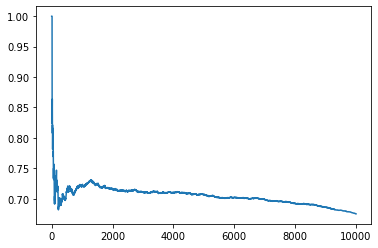

In [44]:
import matplotlib.pyplot as plt
plt.plot(x_axis, y_axis)
plt.show

### QUESTION 9: 

In [45]:
scores = mod.decision_function(x_test)
temp = (scores > 0).astype(numpy.int)
scores = abs(scores)
scores_labels = list(zip(scores,temp,y_test))
scores_labels.sort(reverse = True)
sortedlabels = [(1 if item[1] == item[2] else 0) for item in scores_labels]

In [46]:
precision_1 = sortedlabels[0]/1
print("precision@1: ", precision_1)
precision_100 = sum(sortedlabels[:100])/ 100
print("precision@100: ", precision_100)
precision_10000 = sum(sortedlabels[:10000])/10000
print("precision@10000: ", precision_10000)

precision@1:  1.0
precision@100:  0.7
precision@10000:  0.4941


<function matplotlib.pyplot.show(*args, **kw)>

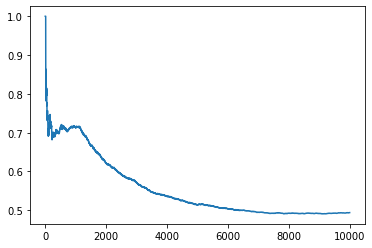

In [47]:
x_axis = [i for i in range(1, 10000)]
y_axis = [sum(sortedlabels[:i])/ i for i in x_axis]
plt.plot(x_axis, y_axis)
plt.show